[Link apresentação 1](https://docs.google.com/presentation/d/1zyHu0vrr0h-wBq8DgQfrgMuBiWZ1hR_g/edit?usp=sharing&ouid=115097960171013324541&rtpof=true&sd=true)

[Link apresentação 2](https://docs.google.com/presentation/d/16_Q74O0NpzeWT0g4aR7dnI4q3urxHmLe/edit?usp=sharing&ouid=100054896519705499640&rtpof=true&sd=true)

# Pré-processamento

Para a coleta de dados, foi utilizado a fonte fornecida pela empresa EVCOMX, de hidrotelemetria. Foi escolhido o periodo de tempo de maio a agosto (3 meses), pois engobla o evento das enchentes que aconteceram no Rio Grande do Sul.

Site fonte: https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

Os dados consistem em informações hídricas das bacias das cidades gaúchas de Muçum, Santa Tereza e Encantado.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('MUCUM maio-ago 2024.csv', encoding='latin-1', delimiter=';', thousands=',')
df = df.drop('Unnamed: 5', axis='columns')

df_2023 = pd.read_csv('MUCUM ago-out 2023.csv', encoding='latin-1', delimiter=';', thousands=',')
df_2023 = df_2023.drop('Unnamed: 5', axis='columns')

df2 = pd.read_csv('SANTA TEREZA maio-ago 2024.csv', encoding='latin-1', delimiter=';', thousands=',')
df2 = df2.drop('Unnamed: 5', axis='columns')

df2_2023 = pd.read_csv('SANTA TEREZA ago-out 2023.csv', encoding='latin-1', delimiter=';', thousands=',')
df2_2023 = df2_2023.drop('Unnamed: 5', axis='columns')

df3 = pd.read_csv('ENCANTADO maio-ago 2024.csv', encoding='latin-1', delimiter=';', thousands=',')
df3 = df3.drop('Unnamed: 5', axis='columns')

df3_2023 = pd.read_csv('ENCANTADO ago-out 2023.csv', encoding='latin-1', delimiter=';', thousands=',')
df3_2023 = df3_2023.drop('Unnamed: 5', axis='columns')

**Juntando as colunas de data e hora, convertendo para datetime**

In [ ]:
df['data_hora'] = df['Data'] + df['Hora']
df['data_hora'] = pd.to_datetime(df['data_hora'], format = '%d/%m/%Y%H:%M:%S')
df_2023['data_hora'] = df_2023['Data'] + df_2023['Hora']
df_2023['data_hora'] = pd.to_datetime(df_2023['data_hora'], format = '%d/%m/%Y%H:%M:%S')

# Remove colunas desnecessárias
df = df.drop('Data', axis='columns')
df = df.drop('Hora', axis='columns')
df_2023 = df_2023.drop('Data', axis='columns')
df_2023 = df_2023.drop('Hora', axis='columns')

df2['data_hora'] = df2['Data'] + df2['Hora']
df2['data_hora'] = pd.to_datetime(df2['data_hora'], format = '%d/%m/%Y%H:%M:%S')
df2_2023['data_hora'] = df2_2023['Data'] + df2_2023['Hora']
df2_2023['data_hora'] = pd.to_datetime(df2_2023['data_hora'], format = '%d/%m/%Y%H:%M:%S')

# Remove colunas desnecessárias
df2 = df2.drop('Data', axis='columns')
df2 = df2.drop('Hora', axis='columns')
df2_2023 = df2_2023.drop('Data', axis='columns')
df2_2023 = df2_2023.drop('Hora', axis='columns')

df3['data_hora'] = df3['Data'] + df3['Hora']
df3['data_hora'] = pd.to_datetime(df3['data_hora'], format = '%d/%m/%Y%H:%M:%S')
df3_2023['data_hora'] = df3_2023['Data'] + df3_2023['Hora']
df3_2023['data_hora'] = pd.to_datetime(df3_2023['data_hora'], format = '%d/%m/%Y%H:%M:%S')

# Remove colunas desnecessárias
df3 = df3.drop('Data', axis='columns')
df3 = df3.drop('Hora', axis='columns')
df3_2023 = df3_2023.drop('Data', axis='columns')
df3_2023 = df3_2023.drop('Hora', axis='columns')


In [ ]:
# Ajusta ordem das colunas para data ficar por primeiro
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

cols = df_2023.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_2023 = df_2023[cols]

cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]

cols = df2_2023.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2_2023 = df2_2023[cols]

cols = df3.columns.tolist()
cols = cols[-1:] + cols[:-1]
df3 = df3[cols]

cols = df3_2023.columns.tolist()
cols = cols[-1:] + cols[:-1]
df3_2023 = df3_2023[cols]

**Transformando numeros em inteiros**

In [ ]:
# Transforma tipo das colunas (timeseries) para inteiros
df['Nível (cm)'] = pd.to_numeric(df['Nível (cm)'], errors='coerce')
df['Chuva (mm)'] = pd.to_numeric(df['Chuva (mm)'], errors='coerce')
df_2023['Nível (cm)'] = pd.to_numeric(df_2023['Nível (cm)'], errors='coerce')
df_2023['Chuva (mm)'] = pd.to_numeric(df_2023['Chuva (mm)'], errors='coerce')

df2['Nível (cm)'] = pd.to_numeric(df2['Nível (cm)'], errors='coerce')
df2['Chuva (mm)'] = pd.to_numeric(df2['Chuva (mm)'], errors='coerce')
df2_2023['Nível (cm)'] = pd.to_numeric(df2_2023['Nível (cm)'], errors='coerce')
df2_2023['Chuva (mm)'] = pd.to_numeric(df2_2023['Chuva (mm)'], errors='coerce')

df3['Nível (cm)'] = pd.to_numeric(df3['Nível (cm)'], errors='coerce')
df3['Chuva (mm)'] = pd.to_numeric(df3['Chuva (mm)'], errors='coerce')
df3_2023['Nível (cm)'] = pd.to_numeric(df3_2023['Nível (cm)'], errors='coerce')
df3_2023['Chuva (mm)'] = pd.to_numeric(df3_2023['Chuva (mm)'], errors='coerce')


**Renomeando colunas**

In [ ]:
colunas_alternativas = ['Data_Hora', 'Chuva', 'Nivel', 'Vazao']
df.columns = colunas_alternativas
df_2023.columns = colunas_alternativas

df2.columns = colunas_alternativas
df2 = df2.drop('Vazao', axis = 'columns') #tudo está nulo
df2_2023.columns = colunas_alternativas

df3.columns = colunas_alternativas
df3_2023.columns = colunas_alternativas

# Análise Exploratória de Dados

## Estatísticas Descritivas

### Medidas de Tendência Central:

In [ ]:
# Média:
media_chuva = df['Chuva'].mean()
media_nivel = df['Nivel'].mean()
media_vazao = df['Vazao'].mean()
media_chuva2023 = df_2023['Chuva'].mean()
media_nivel2023 = df_2023['Nivel'].mean()
media_vazao2023 = df_2023['Vazao'].mean()

# Média:
media_chuva2 = df2['Chuva'].mean()
media_nivel2= df2['Nivel'].mean()
#media_vazao2 = df2['Vazao'].mean()
media_chuva2023_2 = df2_2023['Chuva'].mean()
media_nivel2023_2 = df2_2023['Nivel'].mean()
media_vazao2023_2 = df2_2023['Vazao'].mean()

# Média:
media_chuva3 = df3['Chuva'].mean()
media_nivel3 = df3['Nivel'].mean()
media_vazao3 = df3['Vazao'].mean()
media_chuva2023_3 = df3_2023['Chuva'].mean()
media_nivel2023_3 = df3_2023['Nivel'].mean()
media_vazao2023_3 = df3_2023['Vazao'].mean()

print(f'A média da chuva em Muçum nos meses de maio até agosto de 2024 foi de {media_chuva:.2f} mm, a média do nível do rio foi de {media_nivel:.2f} cm e a média da vazão do rio foi de {media_vazao:.2f} m3/2')
print(f'A média da chuva em Santa Tereza nos meses de maio até agosto de 2024 foi de {media_chuva2:.2f} mm, a média do nível do rio foi de {media_nivel2:.2f} cm e a média da vazão do rio foi de - m3/2')
print(f'A média da chuva em Encantado nos meses de maio até agosto de 2024 foi de {media_chuva3:.2f} mm, a média do nível do rio foi de {media_nivel3:.2f} cm e a média da vazão do rio foi de {media_vazao3:.2f} m3/2')
print(f'A média da chuva em Muçum nos meses de agosto até outubro de 2023 foi de {media_chuva2023:.2f} mm, a média do nível do rio foi de {media_nivel2023:.2f} cm e a média da vazão do rio foi de {media_vazao2023:.2f} m3/2')
print(f'A média da chuva em Santa Tereza nos meses de agosto até outubro de 2023 foi de {media_chuva2023_2:.2f} mm, a média do nível do rio foi de {media_nivel2023_2:.2f} cm e a média da vazão do rio foi de {media_vazao2023_2} m3/2')
print(f'A média da chuva em Encantado nos meses de agosto até outubro de 2023 de {media_chuva2023_3:.2f} mm, a média do nível do rio foi de {media_nivel2023_3:.2f} cm e a média da vazão do rio foi de {media_vazao2023_3:.2f} m3/2')


A média da chuva em Muçum nos meses de maio até agosto de 2024 foi de 0.13 mm, a média do nível do rio foi de 582.91 cm e a média da vazão do rio foi de 1743.51 m3/2
A média da chuva em Santa Tereza nos meses de maio até agosto de 2024 foi de 0.13 mm, a média do nível do rio foi de 574.22 cm e a média da vazão do rio foi de - m3/2
A média da chuva em Encantado nos meses de maio até agosto de 2024 foi de 0.11 mm, a média do nível do rio foi de 326.11 cm e a média da vazão do rio foi de 921.85 m3/2
A média da chuva em Muçum nos meses de agosto até outubro de 2023 foi de 0.10 mm, a média do nível do rio foi de 303.70 cm e a média da vazão do rio foi de 647.85 m3/2
A média da chuva em Santa Tereza nos meses de agosto até outubro de 2023 foi de 0.00 mm, a média do nível do rio foi de nan cm e a média da vazão do rio foi de nan m3/2
A média da chuva em Encantado nos meses de agosto até outubro de 2023 de 0.08 mm, a média do nível do rio foi de 205.90 cm e a média da vazão do rio foi de 306.8

In [ ]:
# Mediana
mediana_chuva = df['Chuva'].median()
mediana_nivel = df['Nivel'].median()
mediana_vazao = df['Vazao'].median()
mediana_chuva2023 = df_2023['Chuva'].median()
mediana_nivel2023 = df_2023['Nivel'].median()
mediana_vazao2023 = df_2023['Vazao'].median()

mediana_chuva2 = df2['Chuva'].median()
mediana_nivel2 = df2['Nivel'].median()
#mediana_vazao2 = df2['Vazao'].median()
mediana_chuva2023_2 = df2_2023['Chuva'].median()
mediana_nivel2023_2 = df2_2023['Nivel'].median()
mediana_vazao2023_2 = df2_2023['Vazao'].median()

mediana_chuva3 = df3['Chuva'].median()
mediana_nivel3 = df3['Nivel'].median()
mediana_vazao3 = df3['Vazao'].median()
mediana_chuva2023_3 = df3_2023['Chuva'].median()
mediana_nivel2023_3 = df3_2023['Nivel'].median()
mediana_vazao2023_3 = df3_2023['Vazao'].median()

print(f'A mediana da chuva em Muçum nos meses de maio até agosto de 2024 foi de {mediana_chuva:.2f} mm, a mediana do nível do rio foi de {mediana_nivel:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao:.2f} m3/2')
print(f'A mediana da chuva em Santa Tereza nos meses de maio até agosto de 2024 foi de {mediana_chuva2:.2f} mm, a mediana do nível do rio foi de {mediana_nivel2:.2f} cm e a mediana da vazão do rio foi de - m3/2')
print(f'A mediana da chuva em Encantado nos meses de maio até agosto de 2024 foi de {mediana_chuva3:.2f} mm, a mediana do nível do rio foi de {mediana_nivel3:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao3:.2f} m3/2')
print(f'A mediana da chuva em Muçum nos meses de agosto até outubro de 2023 foi de {mediana_chuva2023:.2f} mm, a mediana do nível do rio foi de {mediana_nivel2023:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao2023:.2f} m3/2')
print(f'A mediana da chuva em Santa Tereza nos meses de agosto até outubro de 2023 foi de {mediana_chuva2023_2:.2f} mm, a mediana do nível do rio foi de {mediana_nivel2023_2:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao2023_2} m3/2')
print(f'A mediana da chuva em Encantado nos meses de agosto até outubro de 2023 foi de {mediana_chuva2023_3:.2f} mm, a mediana do nível do rio foi de {mediana_nivel2023_3:.2f} cm e a mediana da vazão do rio foi de {mediana_vazao2023_3:.2f} m3/2')

A mediana da chuva em Muçum nos meses de maio até agosto de 2024 foi de 0.00 mm, a mediana do nível do rio foi de 450.00 cm e a mediana da vazão do rio foi de 993.17 m3/2
A mediana da chuva em Santa Tereza nos meses de maio até agosto de 2024 foi de 0.00 mm, a mediana do nível do rio foi de 456.00 cm e a mediana da vazão do rio foi de - m3/2
A mediana da chuva em Encantado nos meses de maio até agosto de 2024 foi de 0.00 mm, a mediana do nível do rio foi de 236.00 cm e a mediana da vazão do rio foi de 190.84 m3/2
A mediana da chuva em Muçum nos meses de agosto até outubro de 2023 foi de 0.00 mm, a mediana do nível do rio foi de 190.00 cm e a mediana da vazão do rio foi de 182.50 m3/2
A mediana da chuva em Santa Tereza nos meses de agosto até outubro de 2023 foi de 0.00 mm, a mediana do nível do rio foi de nan cm e a mediana da vazão do rio foi de nan m3/2
A mediana da chuva em Encantado nos meses de agosto até outubro de 2023 foi de 0.00 mm, a mediana do nível do rio foi de 200.00 cm e

### Medidas de Dispersão:

In [ ]:
# Variância:
variancia_chuva = df['Chuva'].var()
variancia_nivel = df['Nivel'].var()
variancia_vazao = df['Vazao'].var()
variancia_chuva2023 = df_2023['Chuva'].var()
variancia_nivel2023 = df_2023['Nivel'].var()
variancia_vazao2023 = df_2023['Vazao'].var()

variancia_chuva2 = df2['Chuva'].var()
variancia_nivel2 = df2['Nivel'].var()
#variancia_vazao2 = df2['Vazao'].var()
variancia_chuva2023_2 = df2_2023['Chuva'].var()
variancia_nivel2023_2 = df2_2023['Nivel'].var()
variancia_vazao2023_2 = df2_2023['Vazao'].var()

variancia_chuva3 = df3['Chuva'].var()
variancia_nivel3 = df3['Nivel'].var()
variancia_vazao3 = df3['Vazao'].var()
variancia_chuva2023_3 = df3_2023['Chuva'].var()
variancia_nivel2023_3 = df3_2023['Nivel'].var()
variancia_vazao2023_3 = df3_2023['Vazao'].var()

print(f'A variância da chuva em Muçum nos meses de maio até agosto foi de {variancia_chuva:.2f} mm, a variância do nível do rio foi de {variancia_nivel:.2f} cm e a variância da vazão do rio foi de {variancia_vazao:.2f} m3/2')
print(f'A variância da chuva em Santa Tereza nos meses de maio até agosto foi de {variancia_chuva2:.2f} mm, a variância do nível do rio foi de {variancia_nivel2:.2f} cm e a variância da vazão do rio foi de - m3/2')
print(f'A variância da chuva em Encantado nos meses de maio até agosto foi de {variancia_chuva3:.2f} mm, a variância do nível do rio foi de {variancia_nivel3:.2f} cm e a variância da vazão do rio foi de {variancia_vazao3:.2f} m3/2')
print(f'A variância da chuva em Muçum nos meses de agosto até outubro foi de {variancia_chuva2023:.2f} mm, a variância do nível do rio foi de {variancia_nivel2023:.2f} cm e a variância da vazão do rio foi de {variancia_vazao2023:.2f} m3/2')
print(f'A variância da chuva em Santa Tereza nos meses de agosto até outubro foi de {variancia_chuva2023_2:.2f} mm, a variância do nível do rio foi de {variancia_nivel2023_2:.2f} cm e a variância da vazão do rio foi de {variancia_vazao2023_2} m3/2')
print(f'A variância da chuva em Encantado nos meses de agosto até outubro foi de {variancia_chuva2023_3:.2f} mm, a variância do nível do rio foi de {variancia_nivel2023_3:.2f} cm e a variância da vazão do rio foi de {variancia_vazao2023_3:.2f} m3/2')

A variância da chuva em Muçum nos meses de maio até agosto foi de 0.52 mm, a variância do nível do rio foi de 190909.69 cm e a variância da vazão do rio foi de 4989206.08 m3/2
A variância da chuva em Santa Tereza nos meses de maio até agosto foi de 0.47 mm, a variância do nível do rio foi de 143752.76 cm e a variância da vazão do rio foi de - m3/2
A variância da chuva em Encantado nos meses de maio até agosto foi de 0.30 mm, a variância do nível do rio foi de 34636.86 cm e a variância da vazão do rio foi de 3228346.33 m3/2
A variância da chuva em Muçum nos meses de agosto até outubro foi de 0.36 mm, a variância do nível do rio foi de 42624.95 cm e a variância da vazão do rio foi de 772803.40 m3/2
A variância da chuva em Santa Tereza nos meses de agosto até outubro foi de nan mm, a variância do nível do rio foi de nan cm e a variância da vazão do rio foi de nan m3/2
A variância da chuva em Encantado nos meses de agosto até outubro foi de 0.83 mm, a variância do nível do rio foi de 1850.

In [ ]:
# Desvio Padrão:
desvio_chuva = df['Chuva'].std()
desvio_nivel = df['Nivel'].std()
desvio_vazao = df['Vazao'].std()
desvio_chuva2023 = df_2023['Chuva'].std()
desvio_nivel2023 = df_2023['Nivel'].std()
desvio_vazao2023 = df_2023['Vazao'].std()

desvio_chuva2 = df2['Chuva'].std()
desvio_nivel2 = df2['Nivel'].std()
#desvio_vazao2 = df2['Vazao'].std()
desvio_chuva2023_2 = df2_2023['Chuva'].std()
desvio_nivel2023_2 = df2_2023['Nivel'].std()
desvio_vazao2023_2 = df2_2023['Vazao'].std()

desvio_chuva3 = df3['Chuva'].std()
desvio_nivel3 = df3['Nivel'].std()
desvio_vazao3 = df3['Vazao'].std()
desvio_chuva2023_3 = df3_2023['Chuva'].std()
desvio_nivel2023_3 = df3_2023['Nivel'].std()
desvio_vazao2023_3 = df3_2023['Vazao'].std()

print(f'O desvio padrão da chuva em Muçum nos meses de maio até agosto foi de {desvio_chuva:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao:.2f} m3/2')
print(f'O desvio padrão da chuva em Santa Tereza nos meses de maio até agosto foi de {desvio_chuva2:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel2:.2f} cm e o desvio padrão da vazão do rio foi de - m3/2')
print(f'O desvio padrão da chuva em Encantado nos meses de maio até agosto foi de {desvio_chuva3:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel3:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao3:.2f} m3/2')
print(f'O desvio padrão da chuva em Muçum nos meses de agosto até outubro foi de {desvio_chuva2023:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel2023:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao2023:.2f} m3/2')
print(f'O desvio padrão da chuva em Santa Tereza nos meses de agosto até outubro foi de {desvio_chuva2023_2:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel2023_2:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao2023_2} m3/2')
print(f'O desvio padrão da chuva em Encantado nos meses de agosto até outubro foi de {desvio_chuva2023_3:.2f} mm, o desvio padrão do nível do rio foi de {desvio_nivel2023_3:.2f} cm e o desvio padrão da vazão do rio foi de {desvio_vazao2023_3:.2f} m3/2')


O desvio padrão da chuva em Muçum nos meses de maio até agosto foi de 0.72 mm, o desvio padrão do nível do rio foi de 436.93 cm e o desvio padrão da vazão do rio foi de 2233.65 m3/2
O desvio padrão da chuva em Santa Tereza nos meses de maio até agosto foi de 0.69 mm, o desvio padrão do nível do rio foi de 379.15 cm e o desvio padrão da vazão do rio foi de - m3/2
O desvio padrão da chuva em Encantado nos meses de maio até agosto foi de 0.55 mm, o desvio padrão do nível do rio foi de 186.11 cm e o desvio padrão da vazão do rio foi de 1796.76 m3/2
O desvio padrão da chuva em Muçum nos meses de agosto até outubro foi de 0.60 mm, o desvio padrão do nível do rio foi de 206.46 cm e o desvio padrão da vazão do rio foi de 879.09 m3/2
O desvio padrão da chuva em Santa Tereza nos meses de agosto até outubro foi de nan mm, o desvio padrão do nível do rio foi de nan cm e o desvio padrão da vazão do rio foi de nan m3/2
O desvio padrão da chuva em Encantado nos meses de agosto até outubro foi de 0.91

### Univariado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

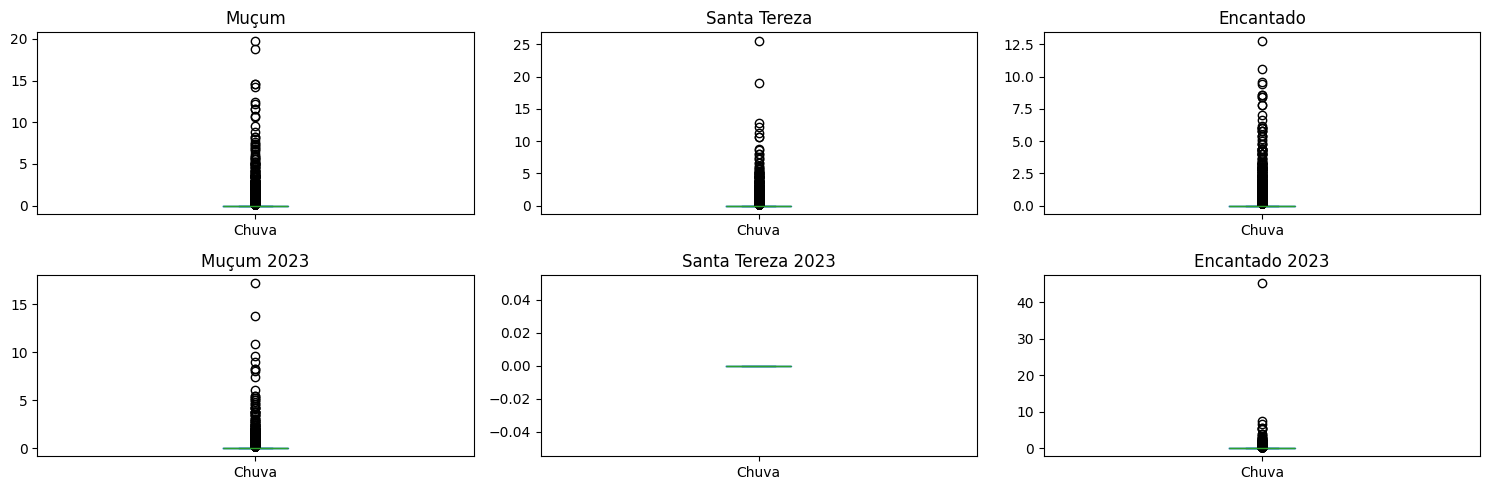

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

df['Chuva'].plot(kind='box', ax=axes[0,0])
axes[0][0].set_title('Muçum')
df_2023['Chuva'].plot(kind='box', ax=axes[1,0])
axes[1][0].set_title('Muçum 2023')

df2['Chuva'].plot(kind='box', ax=axes[0,1])
axes[0][1].set_title('Santa Tereza')
df2_2023['Chuva'].plot(kind='box', ax=axes[1,1])
axes[1][1].set_title('Santa Tereza 2023')

df3['Chuva'].plot(kind='box', ax=axes[0,2])
axes[0][2].set_title('Encantado')
df3_2023['Chuva'].plot(kind='box', ax=axes[1,2])
axes[1][2].set_title('Encantado 2023')

plt.tight_layout()
plt.show()

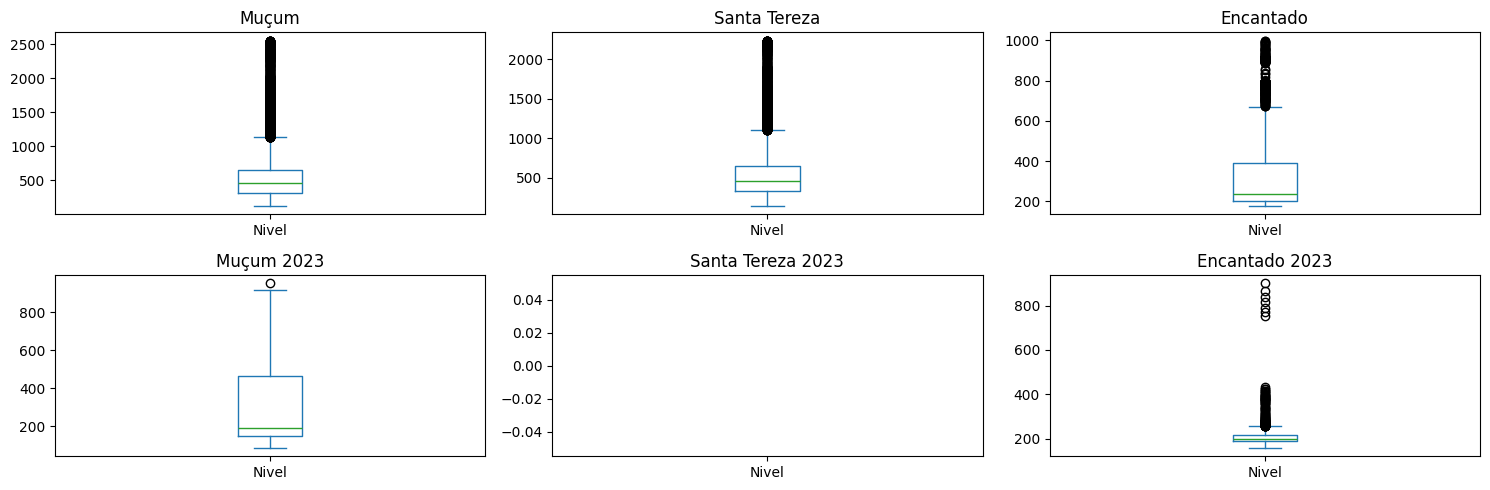

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

df['Nivel'].plot(kind='box', ax=axes[0,0])
axes[0][0].set_title('Muçum')
df_2023['Nivel'].plot(kind='box', ax=axes[1,0])
axes[1][0].set_title('Muçum 2023')

df2['Nivel'].plot(kind='box', ax=axes[0,1])
axes[0][1].set_title('Santa Tereza')
df2_2023['Nivel'].plot(kind='box', ax=axes[1,1])
axes[1][1].set_title('Santa Tereza 2023')

df3['Nivel'].plot(kind='box', ax=axes[0,2])
axes[0][2].set_title('Encantado')
df3_2023['Nivel'].plot(kind='box', ax=axes[1,2])
axes[1][2].set_title('Encantado 2023')

plt.tight_layout()
plt.show()

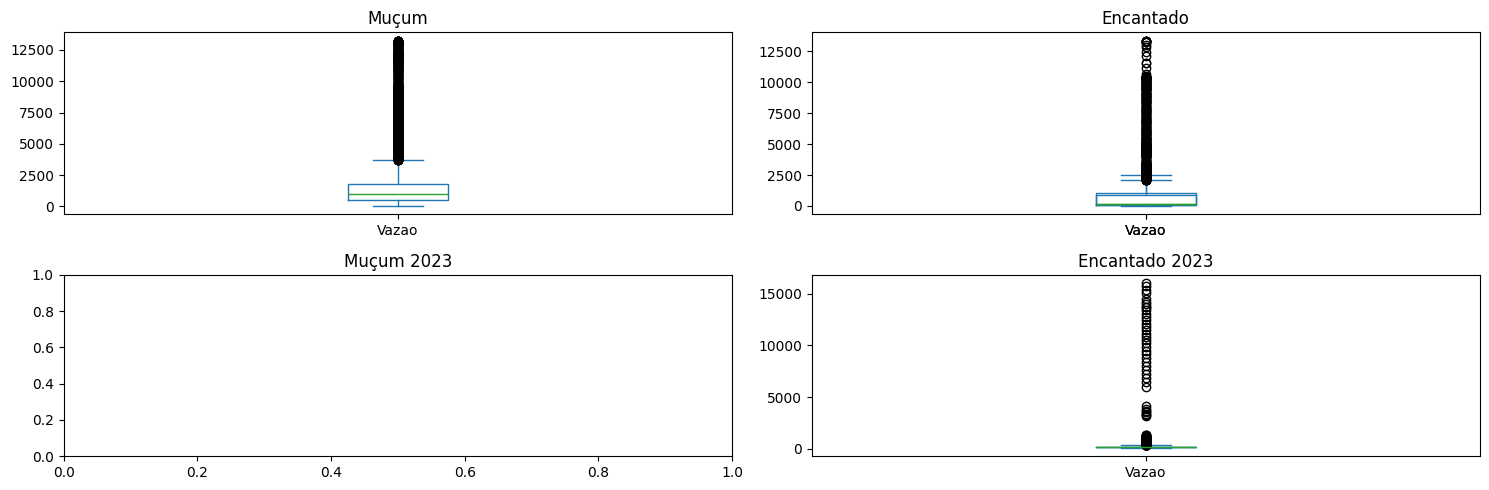

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

df['Vazao'].plot(kind='box', ax=axes[0,0])
axes[0][0].set_title('Muçum')
df_2023['Vazao'].plot(kind='box', ax=axes[0,1])
axes[1][0].set_title('Muçum 2023')

df3['Vazao'].plot(kind='box', ax=axes[0,1])
axes[0][1].set_title('Encantado')
df3_2023['Vazao'].plot(kind='box', ax=axes[1,1])
axes[1][1].set_title('Encantado 2023')

plt.tight_layout()
plt.show()

### Bivariado

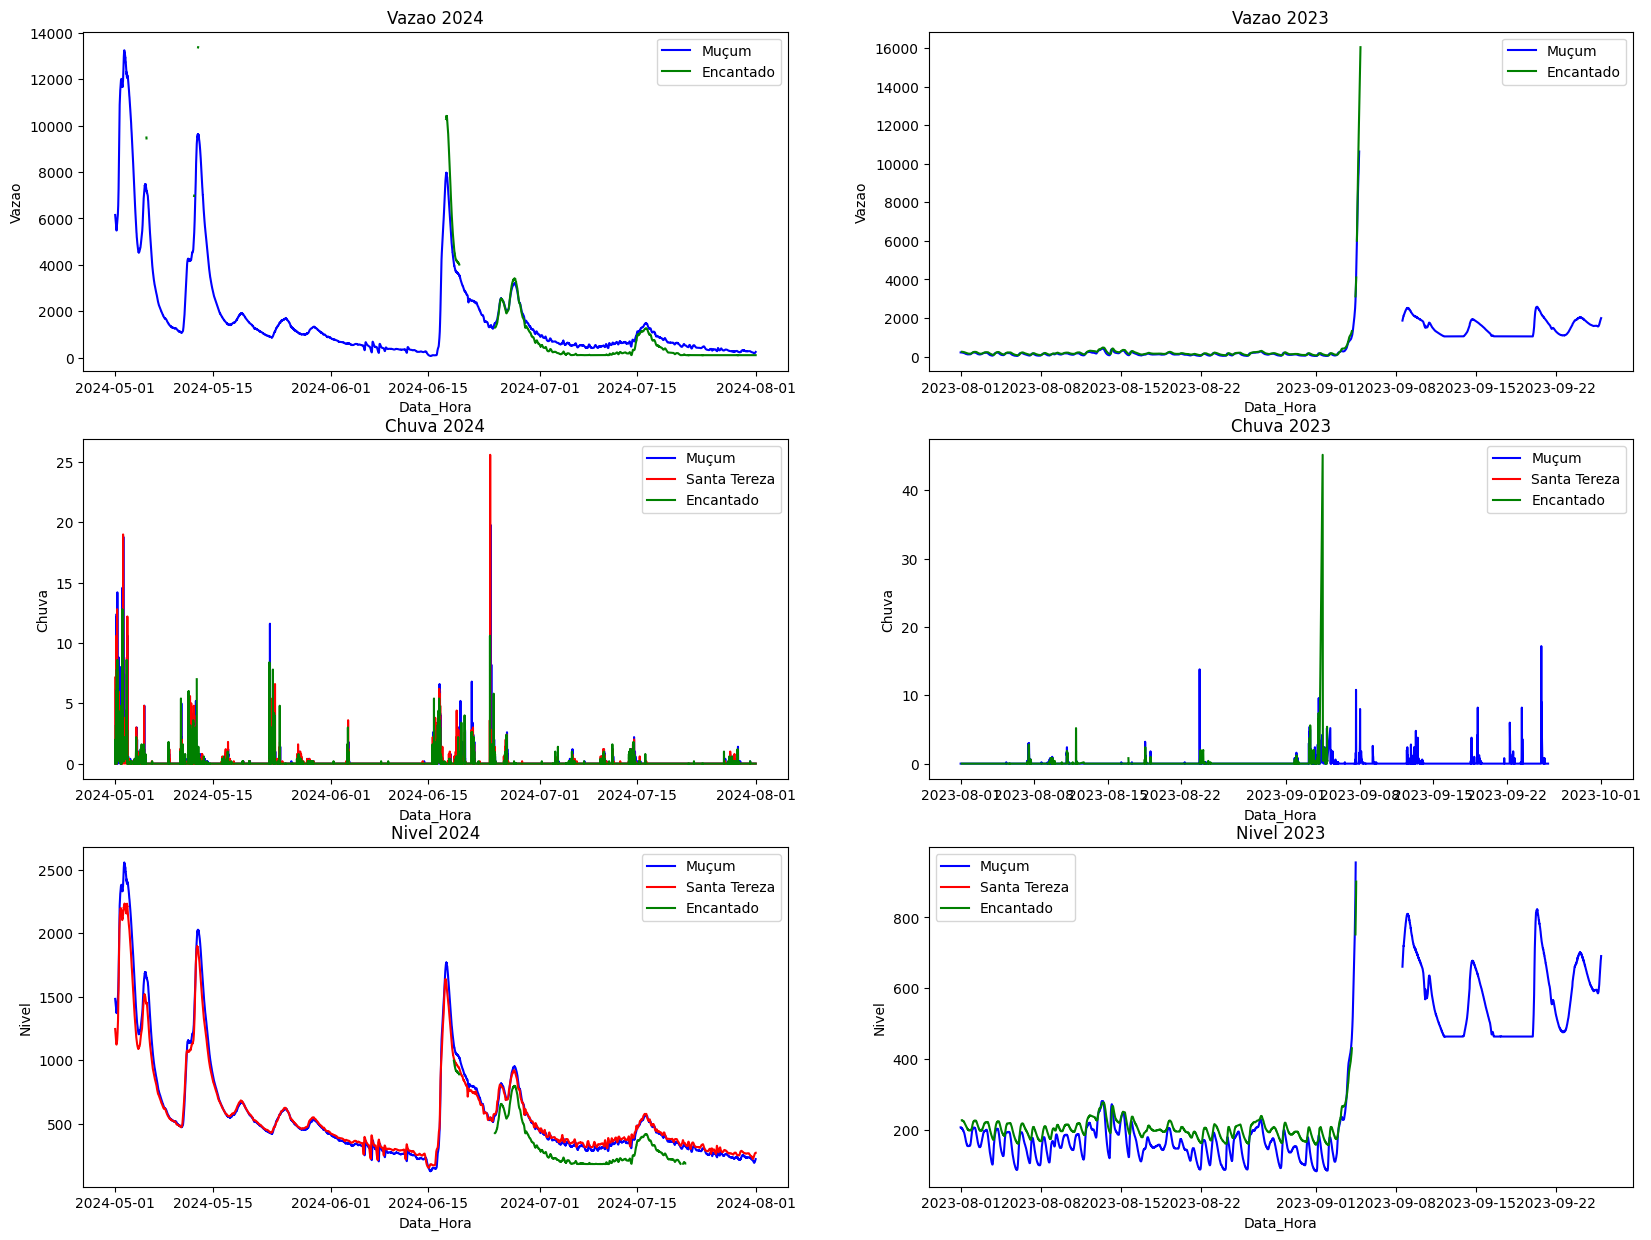

In [ ]:
# Create the subplots in a single row
fig, axs = plt.subplots(3, 2, figsize=(20, 15), sharex=False)

# Plot each timeseries
axs[0][0].plot(df['Data_Hora'], df['Vazao'], color='blue')
axs[0][0].plot(df3['Data_Hora'], df3['Vazao'], color='green')
axs[0][0].set_title('Vazao 2024')
axs[0][0].set_xlabel('Data_Hora')
axs[0][0].set_ylabel('Vazao')
axs[0][0].legend(['Muçum', 'Encantado'])
axs[0][1].plot(df_2023['Data_Hora'], df_2023['Vazao'], color='blue')
axs[0][1].plot(df3_2023['Data_Hora'], df3_2023['Vazao'], color='green')
axs[0][1].set_title('Vazao 2023')
axs[0][1].set_xlabel('Data_Hora')
axs[0][1].set_ylabel('Vazao')
axs[0][1].legend(['Muçum', 'Encantado'])

axs[1][0].plot(df['Data_Hora'], df['Chuva'], color='blue')
axs[1][0].plot(df2['Data_Hora'], df2['Chuva'], color='red')
axs[1][0].plot(df3['Data_Hora'], df3['Chuva'], color='green')
axs[1][0].set_title('Chuva 2024')
axs[1][0].set_xlabel('Data_Hora')
axs[1][0].set_ylabel('Chuva')
axs[1][0].legend(['Muçum', 'Santa Tereza', 'Encantado'])
axs[1][1].plot(df_2023['Data_Hora'], df_2023['Chuva'], color='blue')
axs[1][1].plot(df2_2023['Data_Hora'], df2_2023['Chuva'], color='red')
axs[1][1].plot(df3_2023['Data_Hora'], df3_2023['Chuva'], color='green')
axs[1][1].set_title('Chuva 2023')
axs[1][1].set_xlabel('Data_Hora')
axs[1][1].set_ylabel('Chuva')
axs[1][1].legend(['Muçum', 'Santa Tereza', 'Encantado'])

axs[2][0].plot(df['Data_Hora'], df['Nivel'], color='blue')
axs[2][0].plot(df2['Data_Hora'], df2['Nivel'], color='red')
axs[2][0].plot(df3['Data_Hora'], df3['Nivel'], color='green')
axs[2][0].set_title('Nivel 2024')
axs[2][0].set_xlabel('Data_Hora')
axs[2][0].set_ylabel('Nivel')
axs[2][0].legend(['Muçum', 'Santa Tereza', 'Encantado'])
axs[2][1].plot(df_2023['Data_Hora'], df_2023['Nivel'], color='blue')
axs[2][1].plot(df2_2023['Data_Hora'], df2_2023['Nivel'], color='red')
axs[2][1].plot(df3_2023['Data_Hora'], df3_2023['Nivel'], color='green')
axs[2][1].set_title('Nivel 2023')
axs[2][1].set_xlabel('Data_Hora')
axs[2][1].set_ylabel('Nivel')
axs[2][1].legend(['Muçum', 'Santa Tereza', 'Encantado'])

# Adjust layout and show plot

plt.show()

### Multivariado

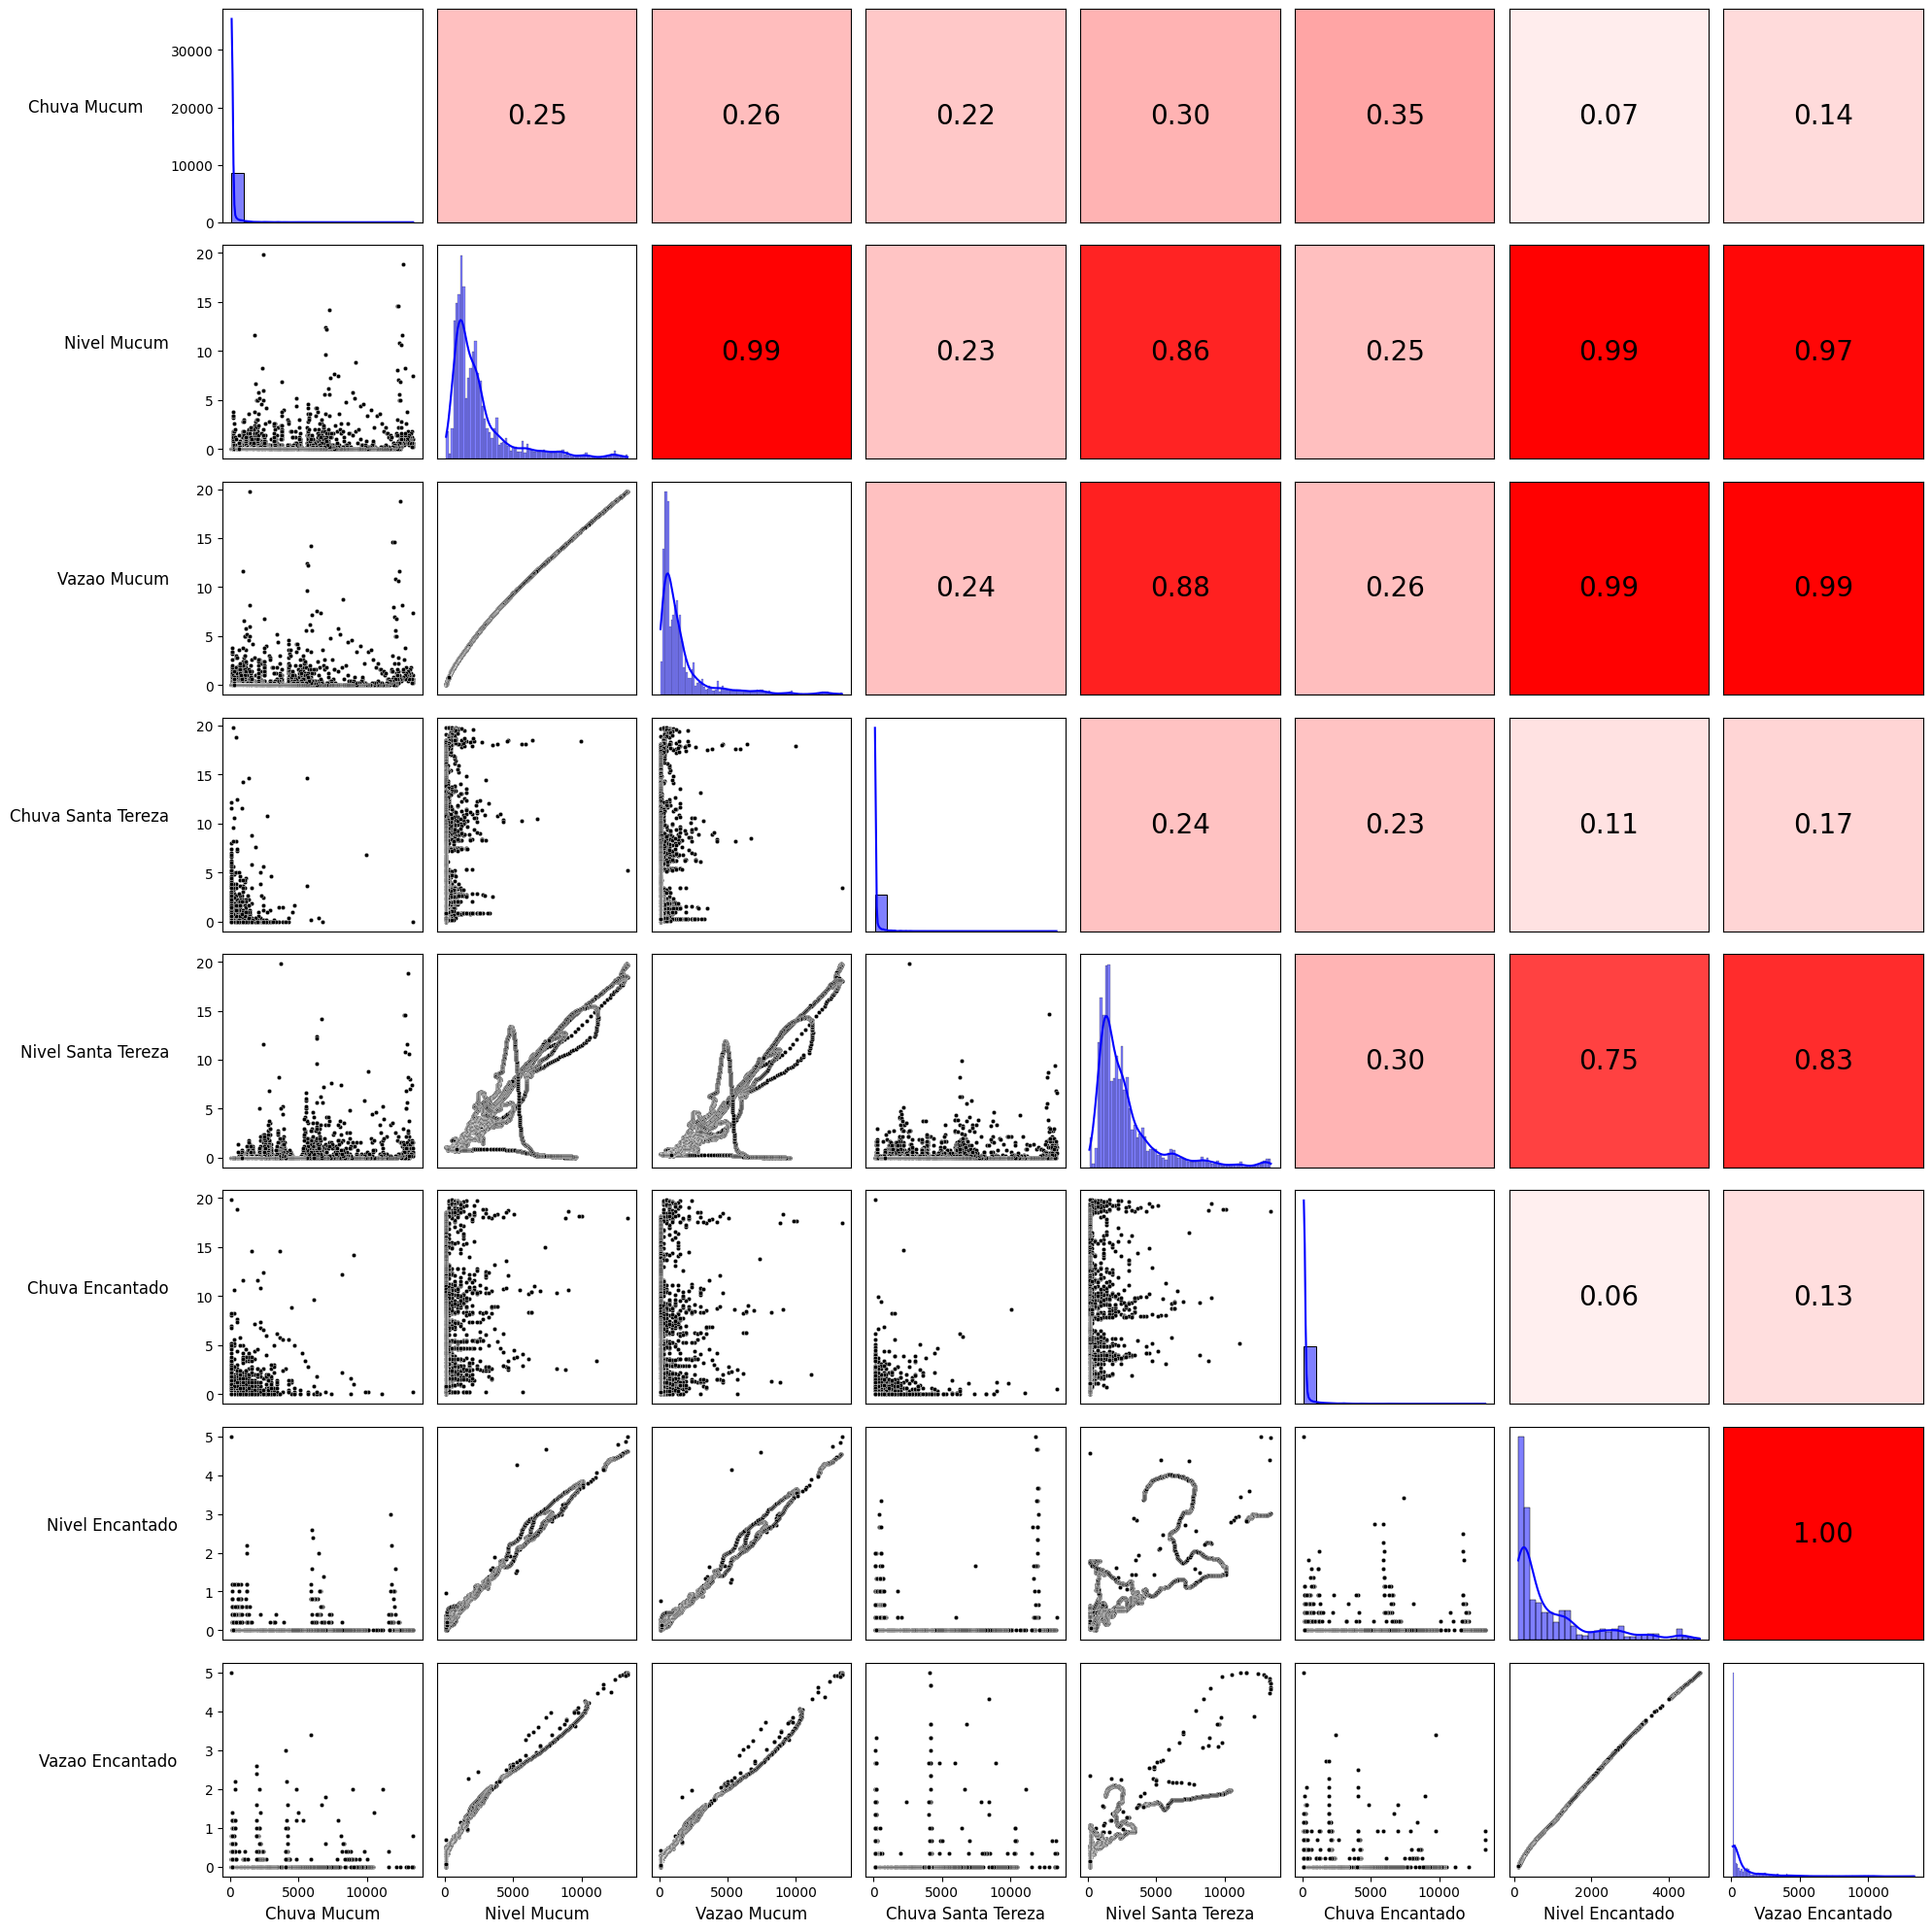

In [ ]:
import seaborn as sns

dfm = df
df2m = df2
df3m = df3

dfm.columns = ['Data_Hora Mucum', 'Chuva Mucum', 'Nivel Mucum', 'Vazao Mucum']
df2m.columns = ['Data_Hora Santa Tereza', 'Chuva Santa Tereza', 'Nivel Santa Tereza']
df3m.columns = ['Data_Hora Encantado', 'Chuva Encantado', 'Nivel Encantado', 'Vazao Encantado']

dfm=dfm.drop('Data_Hora Mucum', axis='columns')
df2m=df2m.drop('Data_Hora Santa Tereza', axis='columns')
df3m=df3m.drop('Data_Hora Encantado', axis='columns')

df_combinado = pd.concat([dfm, df2m, df3m], axis=1)

fig, axes = plt.subplots(len(df_combinado.columns), len(df_combinado.columns), figsize=(20, 20))


for i, col1 in enumerate(df_combinado.columns):
    for j, col2 in enumerate(df_combinado.columns):
        ax = axes[i, j]
        if i == j:
            #remove legenda duplicada, gera histogramas
            sns.histplot(df_combinado[col1], kde=True, ax=ax, color = "blue")
            ax.set_xlabel('')
            ax.set_ylabel('')
        elif i < j:
            #mostra correlação em número
            corr = df_combinado[col1].corr(df_combinado[col2])
            vermelho= abs(corr)
            ax.set_facecolor((1, 1- vermelho, 1 - vermelho))
            ax.text(0.5, 0.5, f"{corr:.2f}", ha='center', va='center', fontsize=20, color="black")
        else:
            #mostra correlação em scatterplot
            sns.scatterplot(x=df_combinado[col1], y=df_combinado[col2], ax=ax, s=10, color = "black")
            ax.set_xlabel('')
            ax.set_ylabel('')

        if i < len(df_combinado.columns) - 1:
            ax.set_xticks([])
        if j > 0:
            ax.set_yticks([])

        if j == 0:
            ax.set_ylabel(col1, fontsize=12, rotation=0, labelpad=20, ha='right')
        if i == len(df_combinado.columns) - 1:
            ax.set_xlabel(col2, fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('matriz_correlacao.png')
plt.show()


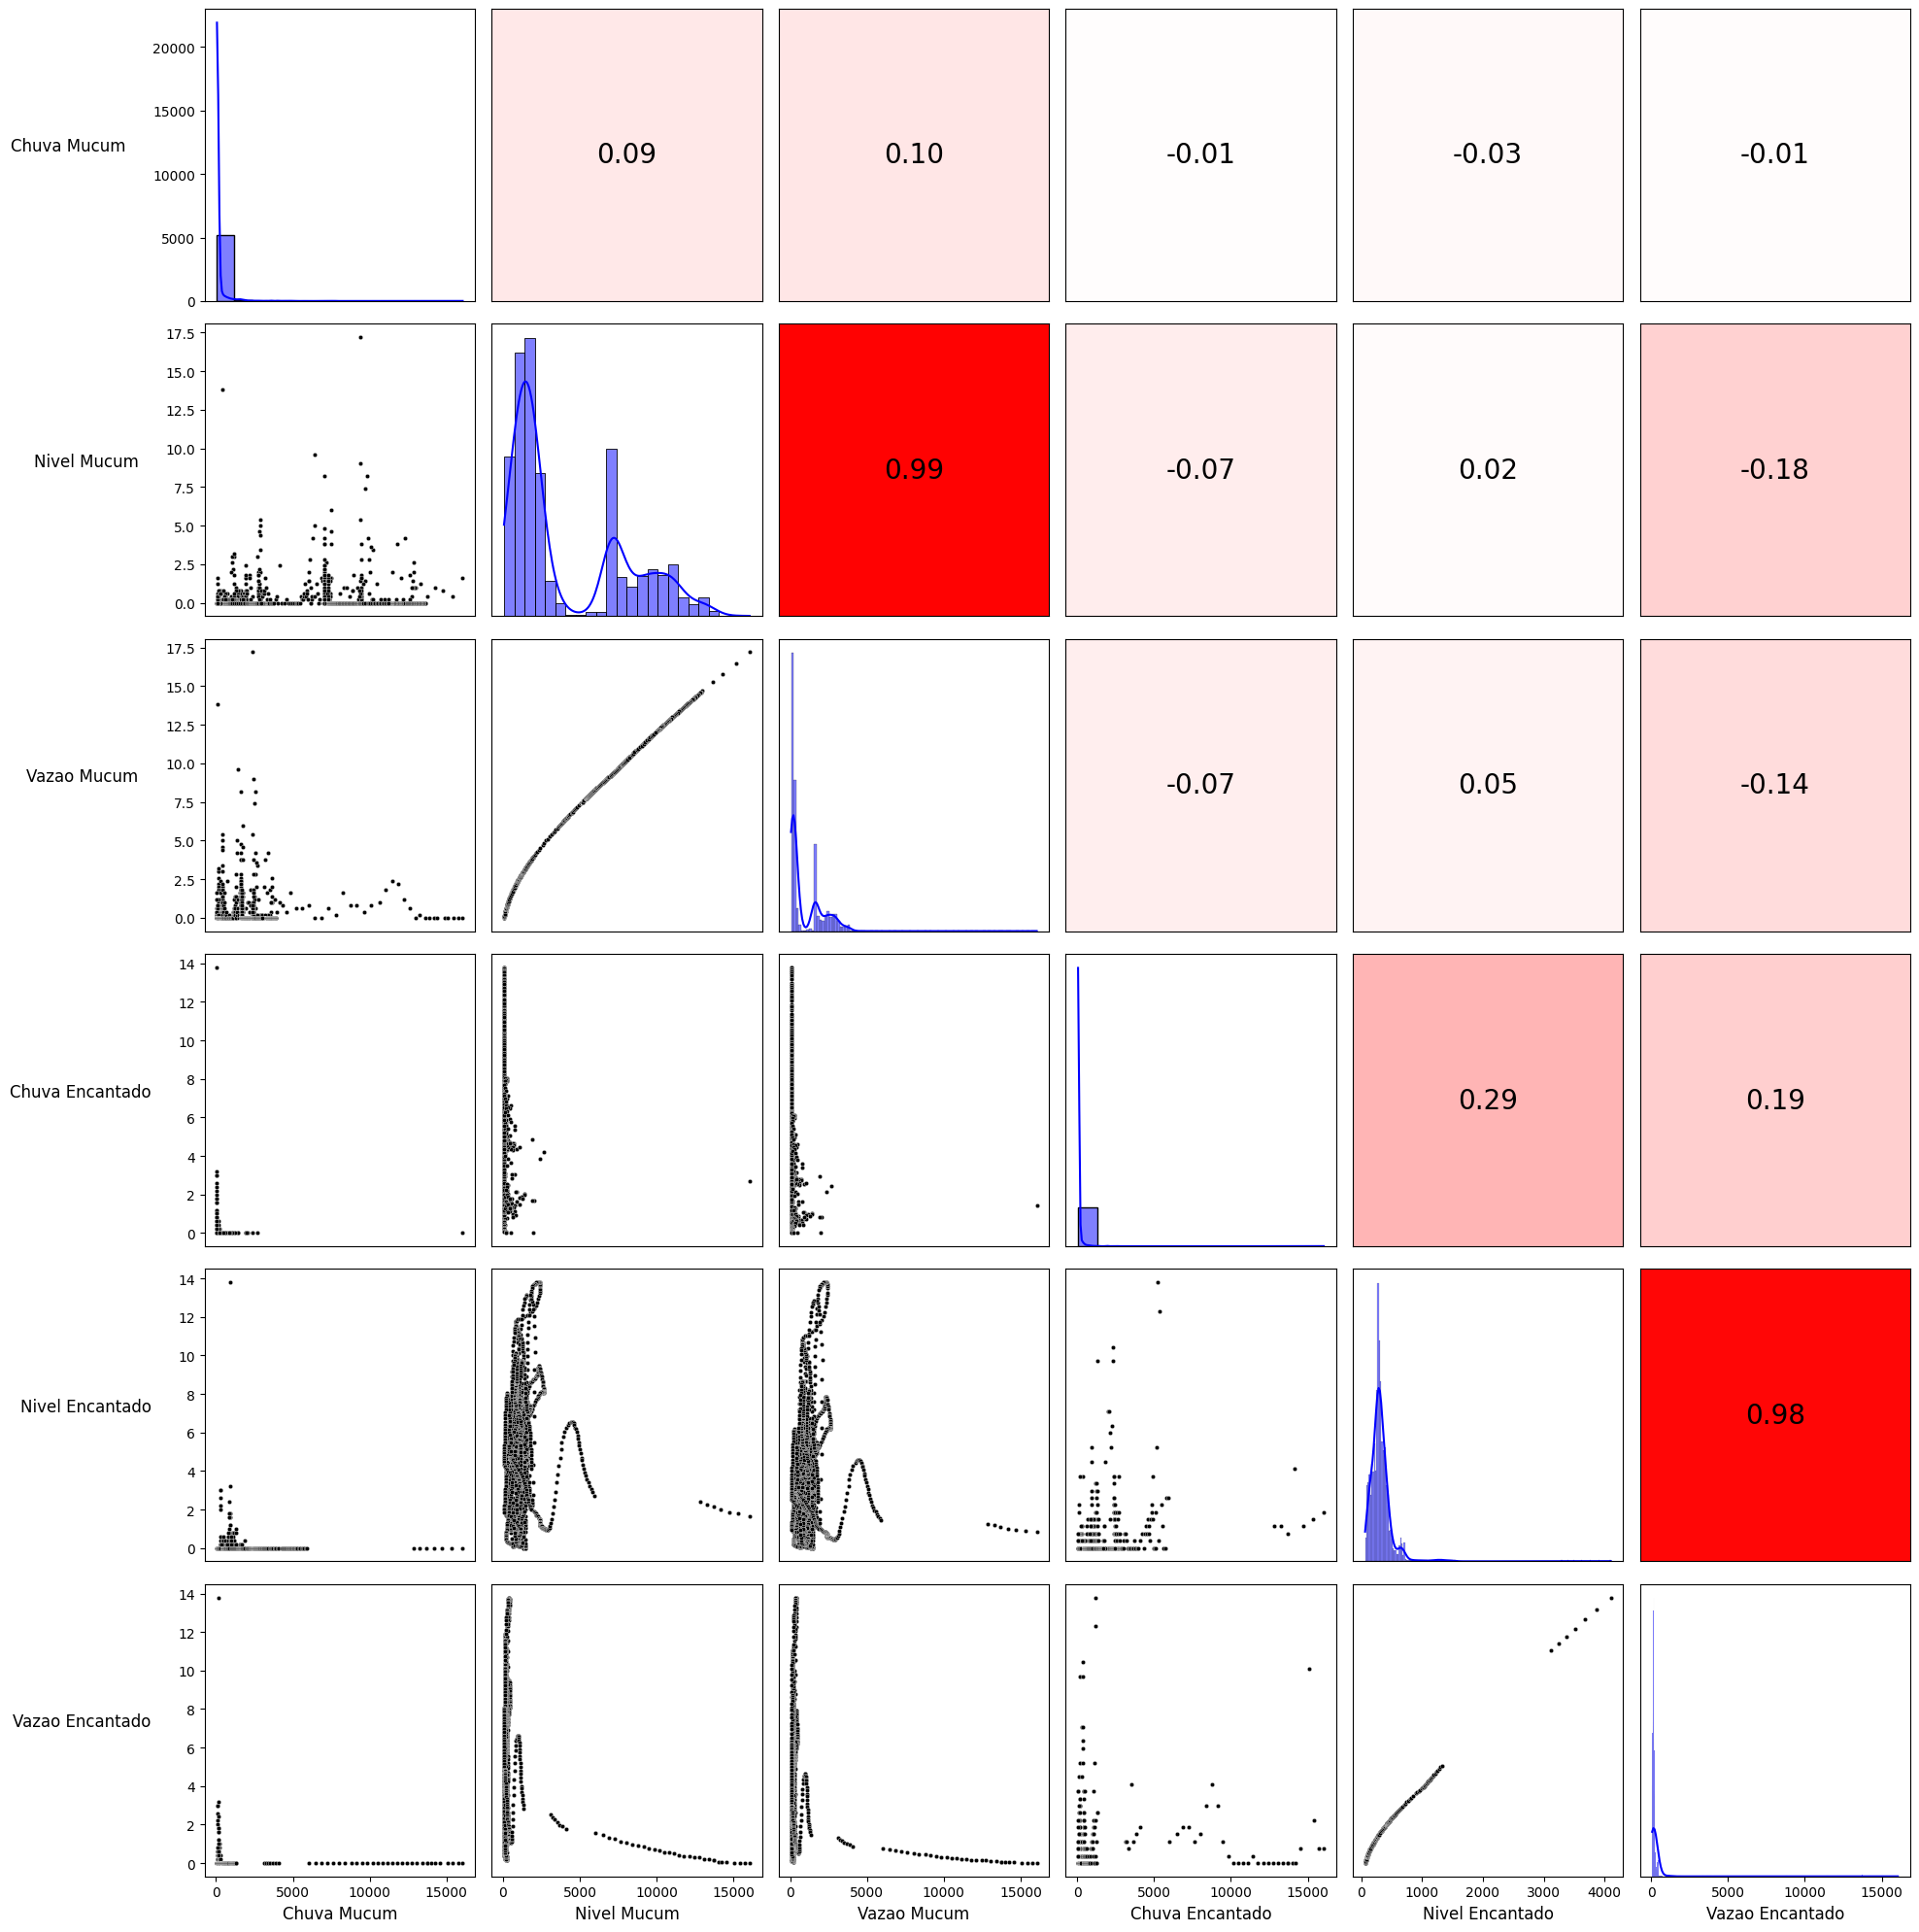

In [ ]:
df_2023m = df_2023
df3_2023m = df3_2023

df_2023m.columns = ['Data_Hora Mucum', 'Chuva Mucum', 'Nivel Mucum', 'Vazao Mucum']
#df2_2023.columns = ['Data_Hora Santa Tereza', 'Chuva Santa Tereza', 'Nivel Santa Tereza', 'Vazao Santa Tereza']
df3_2023m.columns = ['Data_Hora Encantado', 'Chuva Encantado', 'Nivel Encantado', 'Vazao Encantado']

df_2023m=df_2023m.drop('Data_Hora Mucum', axis='columns')
#df2_2023=df2_2023.drop('Data_Hora Santa Tereza', axis='columns')
df3_2023m=df3_2023m.drop('Data_Hora Encantado', axis='columns')

df_combinado = pd.concat([df_2023m, df3_2023m], axis=1)

fig, axes = plt.subplots(len(df_combinado.columns), len(df_combinado.columns), figsize=(20, 20))


for i, col1 in enumerate(df_combinado.columns):
    for j, col2 in enumerate(df_combinado.columns):
        ax = axes[i, j]
        if i == j:
            #remove legenda duplicada, gera histogramas
            sns.histplot(df_combinado[col1], kde=True, ax=ax, color = "blue")
            ax.set_xlabel('')
            ax.set_ylabel('')
        elif i < j:
            #mostra correlação em número
            corr = df_combinado[col1].corr(df_combinado[col2])
            vermelho= abs(corr)
            ax.set_facecolor((1, 1- vermelho, 1 - vermelho))
            ax.text(0.5, 0.5, f"{corr:.2f}", ha='center', va='center', fontsize=20, color="black")
        else:
            #mostra correlação em scatterplot
            sns.scatterplot(x=df_combinado[col1], y=df_combinado[col2], ax=ax, s=10, color = "black")
            ax.set_xlabel('')
            ax.set_ylabel('')

        if i < len(df_combinado.columns) - 1:
            ax.set_xticks([])
        if j > 0:
            ax.set_yticks([])

        if j == 0:
            ax.set_ylabel(col1, fontsize=12, rotation=0, labelpad=20, ha='right')
        if i == len(df_combinado.columns) - 1:
            ax.set_xlabel(col2, fontsize=12, ha='center')

plt.tight_layout()
plt.savefig('matriz_correlacao2.png')
plt.show()


## Outras análises

In [ ]:
# Quantidade de dados nulos no Data Frame
print('Quantidade de dados nulos em Muçum em 2024: ', df.isna().sum())
print('Quantidade de dados nulos em Muçum em 2023: ', df_2023.isna().sum())

Quantidade de dados nulos em Muçum em 2024:  Data_Hora Mucum    0
Chuva Mucum        4
Nivel Mucum        0
Vazao Mucum        0
dtype: int64
Quantidade de dados nulos em Muçum em 2023:  Data_Hora Mucum      0
Chuva Mucum         14
Nivel Mucum        359
Vazao Mucum        330
dtype: int64


In [ ]:
print('Quantidade de dados nulos em Santa Tereza: ', df2.isna().sum())
print('Quantidade de dados nulos em Santa Tereza em 2023: ', df2_2023.isna().sum())

Quantidade de dados nulos em Santa Tereza:  Data_Hora Santa Tereza    0
Chuva Santa Tereza        0
Nivel Santa Tereza        0
dtype: int64
Quantidade de dados nulos em Santa Tereza em 2023:  Data_Hora     0
Chuva        16
Nivel        17
Vazao        17
dtype: int64


In [ ]:
print('Quantidade de dados nulos em Encantado: ', df3.isna().sum())
print('Quantidade de dados nulos em Encantado em 2023: ', df3_2023.isna().sum())

Quantidade de dados nulos em Encantado:  Data_Hora Encantado       0
Chuva Encantado          36
Nivel Encantado        6136
Vazao Encantado        4980
dtype: int64
Quantidade de dados nulos em Encantado em 2023:  Data_Hora Encantado      0
Chuva Encantado        233
Nivel Encantado        260
Vazao Encantado        229
dtype: int64


# Modelagem:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

## Dados de 2024:

In [ ]:
df.columns = colunas_alternativas

df.head()

,Data_Hora,Chuva,Nivel,Vazao
0,2024-05-01 00:00:00,0.0,1482,6147.5
1,2024-05-01 00:15:00,0.0,1476,6111.1
2,2024-05-01 00:30:00,0.0,1471,6080.7
3,2024-05-01 00:45:00,0.0,1464,6038.3
4,2024-05-01 01:00:00,0.0,1459,6008.1


In [ ]:
df = df.set_index('Data_Hora')

In [ ]:
df = df.fillna(0)

df = df.sort_index()

In [ ]:
# define a coluna da previsão
alvo = 'Nivel'
outras_colunas = ['Chuva', 'Vazao']

### Modelo tipo 1: utilizando apenas a variável Nível para previsão

In [ ]:
y_data = df[alvo].values

y_pred = []
y_pred_last = []
y_pred_ma = []
y_true = []

window_size = 6

x_data = []
for i in range(window_size, len(y_data)):
    x_data.append(y_data[i - window_size:i])

y_data = y_data[window_size:]
x_data = np.array(x_data)

In [ ]:
for i in range(window_size, len(y_data)):
    # Dados de treinamento até o ponto atual
    x_train = x_data[:i, :]
    y_train = y_data[:i]

    # Ponto de teste atual
    x_test = x_data[i, :]
    y_test = y_data[i]

    # Treina o modelo
    modelo1 = LinearRegression()
    modelo1.fit(x_train, y_train)

    # Faz previsões
    y_pred.append(modelo1.predict(x_test.reshape(1, -1))[0])
    y_pred_last.append(x_test[-1])
    y_pred_ma.append(np.mean(x_test))
    y_true.append(y_test)

### Modelo tipo 2: utilizando as variáveis Nível, Chuva e Vazao para previsão

In [ ]:
# Obtemos os valores da coluna-alvo como `y_data` e as demais colunas como potenciais recursos
y_data = df[alvo].values
x_data = df[outras_colunas].values

y_pred = []
y_pred_last = []
y_pred_ma = []
y_true = []

In [ ]:
window_size = 6

# Itera pela série temporal treinando um modelo continuamente
for i in range(window_size, len(y_data)):
    # Dados de treinamento até o ponto atual
    x_train = x_data[:i, :]
    y_train = y_data[:i]

    # Ponto de teste atual
    x_test = x_data[i, :]
    y_test = y_data[i]

    # Treina o modelo
    modelo2 = LinearRegression()
    modelo2.fit(x_train, y_train)

    # Faz previsões
    y_pred.append(modelo2.predict(x_test.reshape(1, -1))[0])
    y_pred_last.append(y_train[-1])
    y_pred_ma.append(np.mean(y_train[-window_size:]))
    y_true.append(y_test)

### Valores de erros e gráfico:

In [ ]:
y_pred = np.array(y_pred)
y_pred_last = np.array(y_pred_last)
y_pred_ma = np.array(y_pred_ma)
y_true = np.array(y_true)

In [ ]:
def mape(y_pred, y_true):
    """
    Calcula o Mean Absolute Percentage Error.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true_safe = np.where(y_true == 0, 1e-10, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100


print('\nMean Absolute Percentage Error')
print('MAPE Regressão Linear:', mape(y_pred, y_true))
print('MAPE Último Valor:', mape(y_pred_last, y_true))
print('MAPE Média Móvel:', mape(y_pred_ma, y_true))

print('\nMean Absolute Error')
print('MAE Regressão Linear:', mean_absolute_error(y_pred, y_true))
print('MAE Último Valor:', mean_absolute_error(y_pred_last, y_true))
print('MAE Média Móvel:', mean_absolute_error(y_pred_ma, y_true))



Mean Absolute Percentage Error
MAPE Regressão Linear: 12.948391658504116
MAPE Último Valor: 0.37816890375444856
MAPE Média Móvel: 1.1178506828509076

Mean Absolute Error
MAE Regressão Linear: 46.55670986418913
MAE Último Valor: 2.1908111174135
MAE Média Móvel: 6.848156551332956


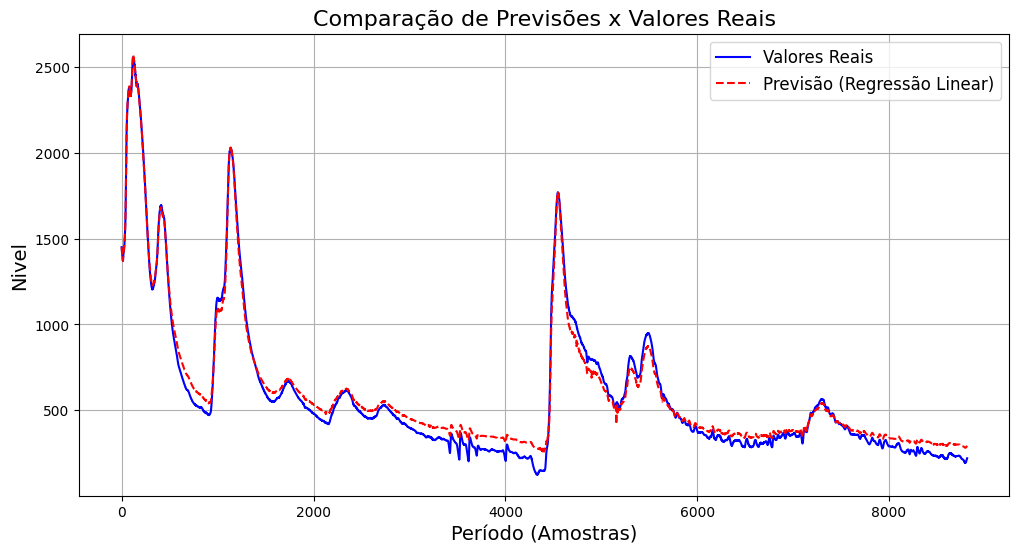

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(range(len(y_true)), y_true, label='Valores Reais', color='blue')

plt.plot(range(len(y_pred)), y_pred, label='Previsão (Regressão Linear)', color='red', linestyle='--')

plt.title('Comparação de Previsões x Valores Reais', fontsize=16)
plt.xlabel('Período (Amostras)', fontsize=14)
plt.ylabel(alvo, fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Dados de 2023:

In [ ]:
df_2023.columns = colunas_alternativas
df_2023.head()

,Data_Hora,Chuva,Nivel,Vazao
0,2023-08-01 00:00:00,0.0,208.0,219.1
1,2023-08-01 00:15:00,0.0,208.0,219.1
2,2023-08-01 00:30:00,0.0,208.0,219.1
3,2023-08-01 00:45:00,0.0,207.0,216.9
4,2023-08-01 01:00:00,0.0,207.0,216.9


In [ ]:
df_2023 = df_2023.set_index('Data_Hora')

df_2023 = df_2023.fillna(0)
df_2023 = df_2023.sort_index()

In [ ]:
# define a coluna da previsão
alvo = 'Nivel'
outras_colunas = ['Chuva', 'Vazao']

### Modelo tipo 1: utilizando somente a variável Nivel para a previsão

In [ ]:
y_data = df_2023[alvo].values

y_pred = []
y_pred_last = []
y_pred_ma = []
y_true = []

window_size = 6

x_data = []
for i in range(window_size, len(y_data)):
    x_data.append(y_data[i - window_size:i])

y_data = y_data[window_size:]
x_data = np.array(x_data)

In [ ]:
for i in range(window_size, len(y_data)):
    # Dados de treinamento até o ponto atual
    x_train = x_data[:i, :]
    y_train = y_data[:i]

    # Ponto de teste atual
    x_test = x_data[i, :]
    y_test = y_data[i]

    # Treina o modelo
    modelo1 = LinearRegression()
    modelo1.fit(x_train, y_train)

    # Faz previsões
    y_pred.append(modelo1.predict(x_test.reshape(1, -1))[0])
    y_pred_last.append(x_test[-1])
    y_pred_ma.append(np.mean(x_test))
    y_true.append(y_test)

### Modelo tipo 2: utilizando as variáveis Nivel, Chuva e Vazao para a previsão

In [ ]:
# Obtemos os valores da coluna-alvo como `y_data` e as demais colunas como potenciais recursos
y_data = df_2023[alvo].values
x_data = df_2023[outras_colunas].values

y_pred = []
y_pred_last = []
y_pred_ma = []
y_true = []

In [ ]:
window_size = 6

# Itera pela série temporal treinando um modelo continuamente
for i in range(window_size, len(y_data)):
    # Dados de treinamento até o ponto atual
    x_train = x_data[:i, :]
    y_train = y_data[:i]

    # Ponto de teste atual
    x_test = x_data[i, :]
    y_test = y_data[i]

    # Treina o modelo
    modelo2 = LinearRegression()
    modelo2.fit(x_train, y_train)

    # Faz previsões
    y_pred.append(modelo2.predict(x_test.reshape(1, -1))[0])
    y_pred_last.append(y_train[-1])
    y_pred_ma.append(np.mean(y_train[-window_size:]))
    y_true.append(y_test)

### Valores de erro e Gráfico:

In [ ]:
y_pred = np.array(y_pred)
y_pred_last = np.array(y_pred_last)
y_pred_ma = np.array(y_pred_ma)
y_true = np.array(y_true)

In [ ]:
def mape(y_pred, y_true):
    """
    Calcula o Mean Absolute Percentage Error.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    y_true_safe = np.where(y_true == 0, 1e-10, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true_safe)) * 100

print('\nMean Absolute Percentage Error')
print('MAPE Regressão Linear:', mape(y_pred, y_true))
print('MAPE Último Valor:', mape(y_pred_last, y_true))
print('MAPE Média Móvel:', mape(y_pred_ma, y_true))

print('\nMean Absolute Error')
print('MAE Regressão Linear:', mean_absolute_error(y_pred, y_true))
print('MAE Último Valor:', mean_absolute_error(y_pred_last, y_true))
print('MAE Média Móvel:', mean_absolute_error(y_pred_ma, y_true))



Mean Absolute Percentage Error
MAPE Regressão Linear: 1426859051830.5894
MAPE Último Valor: 179646350640.3073
MAPE Média Móvel: 592237271133.6499

Mean Absolute Error
MAE Regressão Linear: 2.587828969350296
MAE Último Valor: 1.8306997742663658
MAE Média Móvel: 6.170585653373463


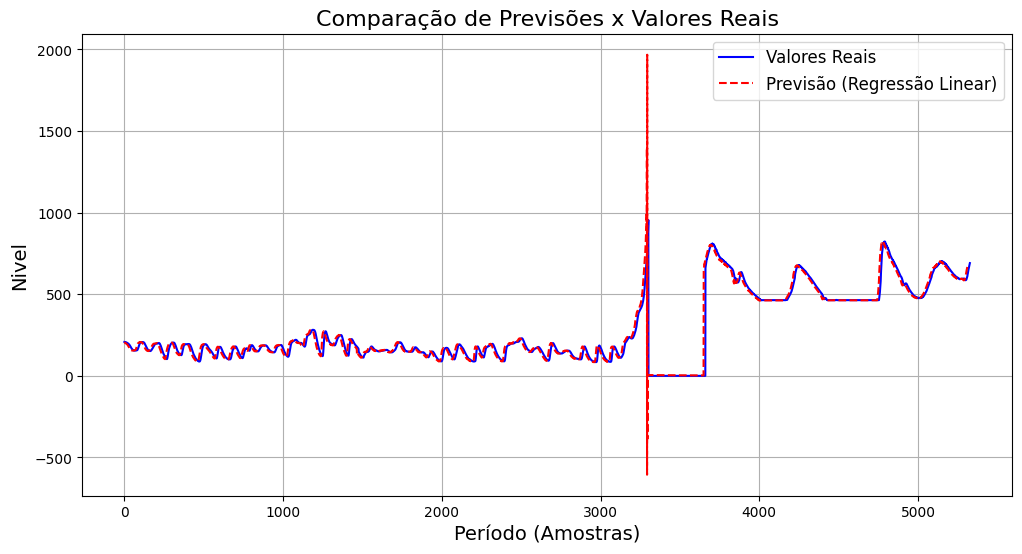

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))

#plt.plot(range(len(y_true)), y_true, label='Valores Reais', color='blue')
plt.plot(range(len(df_2023['Nivel'])), df_2023['Nivel'], label='Valores Reais', color='blue')

plt.plot(range(len(y_pred)), y_pred, label='Previsão (Regressão Linear)', color='red', linestyle='--')

plt.title('Comparação de Previsões x Valores Reais', fontsize=16)
plt.xlabel('Período (Amostras)', fontsize=14)
plt.ylabel(alvo, fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()